In [2]:
import os
import pickle
import matplotlib.pyplot as plt                     
import numpy as np                                    
import pandas as pd
from pathlib import Path
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Random forest and boosting packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#### Slide 6: Directory settings  ####

# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "data"
print(data_dir)

C:\
C:\/data


In [6]:
#### Slide 7: Load the cleaned dataset  ####

costa_clean = pickle.load(open("costa_clean.sav","rb"))
print(costa_clean.head())

   rooms  tablet  males_under_12  males_over_12  males_tot  females_under_12  \
0      3       0               0              1          1                 0   
1      4       1               0              1          1                 0   
2      8       0               0              0          0                 0   
3      5       1               0              2          2                 1   
4      5       1               0              2          2                 1   

   females_over_12  females_tot  ppl_under_12  ppl_over_12  ...  \
0                0            0             0            1  ...   
1                0            0             0            1  ...   
2                1            1             0            1  ...   
3                1            2             1            3  ...   
4                1            2             1            3  ...   

   region_central  region_Chorotega  region_pacifico  region_brunca  \
0               1                 0          

In [7]:
#### Slide 8: Print info for our data  ####

costa_clean.columns


Index(['rooms', 'tablet', 'males_under_12', 'males_over_12', 'males_tot',
       'females_under_12', 'females_over_12', 'females_tot', 'ppl_under_12',
       'ppl_over_12', 'ppl_total', 'years_of_schooling', 'wall_block_brick',
       'wall_socket', 'wall_prefab_cement', 'wall_wood', 'floor_mos_cer_terr',
       'floor_cement', 'floor_wood', 'ceiling', 'electric_public',
       'electric_coop', 'toilet_sewer', 'toilet_septic', 'cookenergy_elec',
       'cookenergy_gas', 'trash_truck', 'trash_burn', 'wall_bad', 'wall_reg',
       'wall_good', 'roof_bad', 'roof_reg', 'roof_good', 'floor_bad',
       'floor_reg', 'floor_good', 'disabled_ppl', 'male', 'female', 'under10',
       'free', 'married', 'separated', 'single', 'hh_head', 'hh_spouse',
       'hh_child', 'num_child', 'num_adults', 'num_65plus', 'num_hh_total',
       'dependency_rate', 'male_hh_head_educ', 'female_hh_head_educ',
       'meaneduc', 'educ_none', 'educ_primary_inc', 'educ_primary',
       'educ_secondary_inc', 'educ_s

In [10]:
#### Slide 9: Split into training and test sets  ####

# Select the predictors and target.
X = costa_clean.drop(['Target'], axis = 1)
y = np.array(costa_clean['Target'])

# Set the seed to 1.
np.random.seed(1)

# Split into the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [11]:
#### Slide 10: Building our model  ####

forest = RandomForestClassifier(criterion = 'gini', 
                                n_estimators = 100, 
                                random_state = 1)

In [12]:
#### Slide 11: Fitting our model  ####

# Fit the saved model to your training data.
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [13]:
#### Slide 12: Predicting with our data  ####

# Predict on test data.
y_predict_forest = forest.predict(X_test)

# Look at the first few predictions.
print(y_predict_forest[0:5,])

[ True  True  True  True  True]


In [14]:
#### Slide 15: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_forest = metrics.confusion_matrix(y_test, y_predict_forest)
print(conf_matrix_forest)
accuracy_forest = metrics.accuracy_score(y_test, y_predict_forest)
print("Accuracy for random forest on test data: ", accuracy_forest)

[[ 941  121]
 [  40 1766]]
Accuracy for random forest on test data:  0.943863319386332


In [15]:
#### Slide 16: Accuracy of the training dataset  ####

# Compute accuracy using training data.
acc_train_forest = forest.score(X_train, y_train)

print ("Train Accuracy:", acc_train_forest)

Train Accuracy: 1.0


In [16]:
#### Slide 17: Evaluation of Random forest  ####

# Create a dictionary with accuracy values for our\ random forest model.
model_final_dict = {'metrics': ["accuracy"],
               'values':[round(accuracy_forest,4)],
                'model':['random_forest'],
                   'notes':['This is the first forest of the bootcamp']}
model_final = pd.DataFrame(data = model_final_dict)
print(model_final)


    metrics  values          model                                     notes
0  accuracy  0.9439  random_forest  This is the first forest of the bootcamp


Text(0.5, 0, 'Relative Importance')

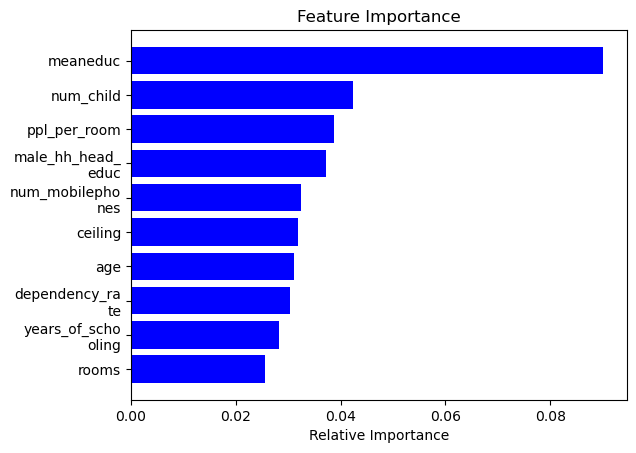

In [17]:
#### Slide 20: Subsetting our features  ####

costarica_features = costa_clean.drop('Target', axis = 1)
features = costarica_features.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[0:10][::-1]

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), labels)
plt.xlabel('Relative Importance')

In [18]:
#### Slide 37: Boosting: build model  ####

# Save the parameters we will be using for our gradient boosting classifier.
gbm = GradientBoostingClassifier(n_estimators = 200, 
                                learning_rate = 1,
                                max_depth = 2, 
                                random_state = 1)

In [19]:
#### Slide 38: Boosting: fit model  ####

# Fit the saved model to your training data.
gbm.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=200,
                           random_state=1)

In [20]:
#### Slide 39: Boosting: predict  ####

# Predict on test data.
predicted_values_gbm = gbm.predict(X_test)
print(predicted_values_gbm)

[ True  True  True ...  True  True False]


In [21]:
#### Slide 40: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_boosting = metrics.confusion_matrix(y_test, predicted_values_gbm)
print(conf_matrix_boosting)
# Compute test model accuracy score.
accuracy_gbm = metrics.accuracy_score(y_test, predicted_values_gbm)
print('Accuracy of gbm on test data: ', accuracy_gbm)

[[ 854  208]
 [ 155 1651]]
Accuracy of gbm on test data:  0.8734309623430963


In [22]:
#### Slide 41: Accuracy of training model  ####

# Compute accuracy using training data.
train_accuracy_gbm = gbm.score(X_train, y_train)

print ("Train Accuracy:", train_accuracy_gbm)


Train Accuracy: 0.9165794588129765


In [23]:
#### Slide 42: Pickle final accuracy  ####

# Add the model to our dataframe.
model_final_forest_gbm = model_final.append(
                        {'metrics' : "accuracy" ,
                        'values' : round(accuracy_gbm,4),
                        'model': 'boosting' } ,
                        ignore_index = True)

print(model_final_forest_gbm)

    metrics  values          model                                     notes
0  accuracy  0.9439  random_forest  This is the first forest of the bootcamp
1  accuracy  0.8734       boosting                                       NaN


C:\Users\heath\AppData\Local\Temp\ipykernel_4516\941870121.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final_forest_gbm = model_final.append(


Text(0.5, 0, 'Relative Importance')

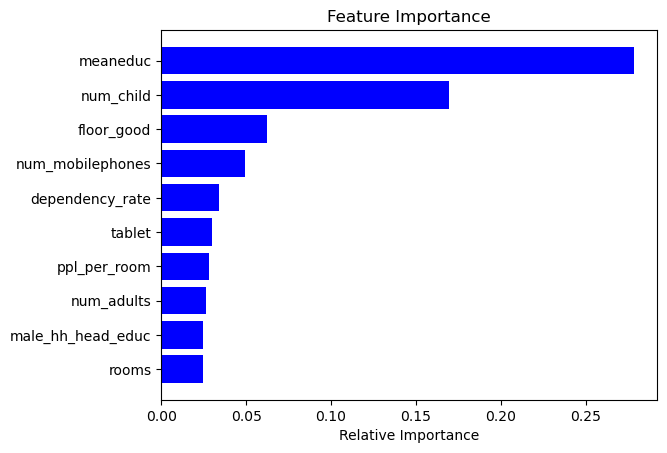

In [24]:
#### Slide 43: Our top 10 features  ####

features = costarica_features.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[0:10][::-1]

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), features[top_indices])
plt.xlabel('Relative Importance')